In [3]:
#WELCOME “This is a ML based model used to predict customer churn using the Telco dataset. The objective was to identify customers who are at risk of leaving so that businesses can take proactive retention measures.”

In [4]:
#installing and importing libraries
!pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [5]:
#loading the dataset


# Load into pandas
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#checking the dataset info
data.info()
data.describe()
data['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


In [7]:
#1869 customers of the total datasert have churned


In [8]:
#exploratory data analysis

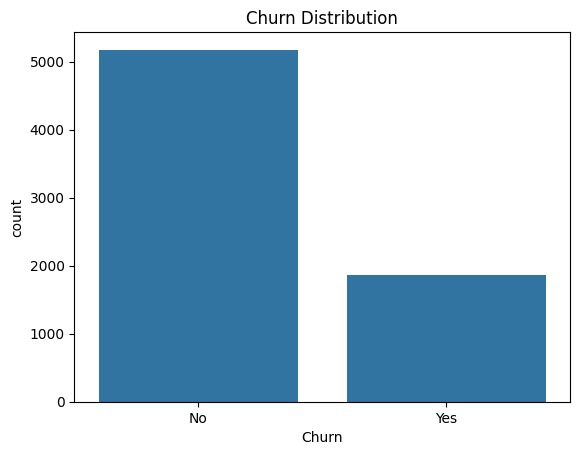

In [9]:

sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()


In [10]:
#INSIGHTS dataset is imbalanced we must focus on recall and f1 score not only on accuracy

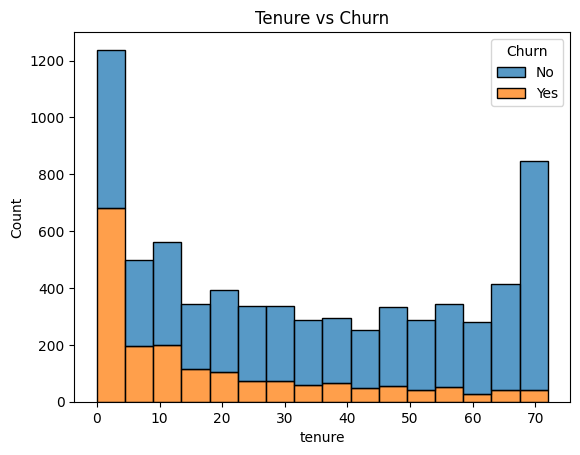

In [11]:
#tenure vs churn
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack')
plt.title("Tenure vs Churn")
plt.show()



In [12]:
#INSIGHTS - customer with low tenure churn the most therefore company should engae more with new customers

In [13]:
#target column
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

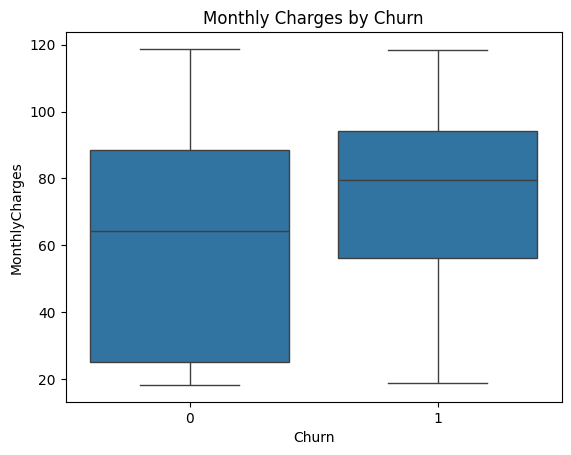

In [14]:
#monthlycharges vs churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges by Churn")
plt.show()


In [15]:
#INSIGHT- people paying monthly charges in higher ranges tend to churn more providing them offers and discounts in between may help

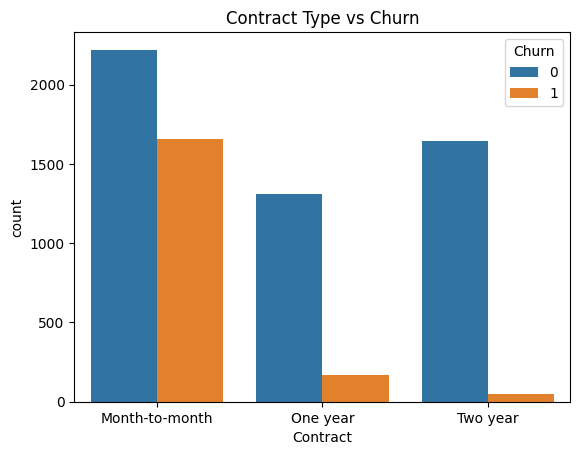

In [16]:
#contract type vs churn
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title("Contract Type vs Churn")
plt.show()


In [17]:
#INSIGHT long term contract retain more customers

([0, 1, 2, 3],
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

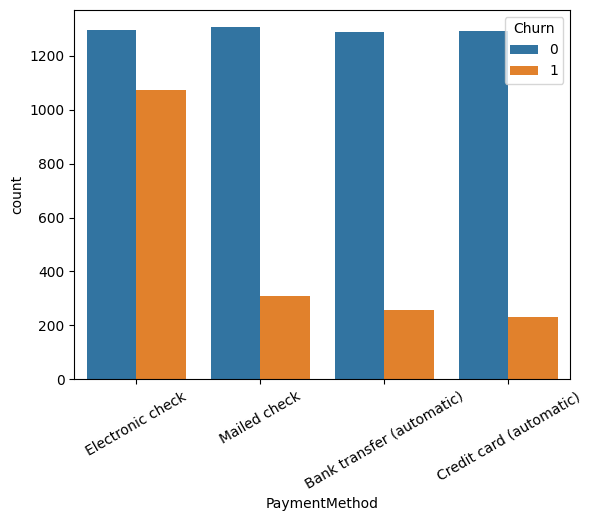

In [18]:
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.xticks(rotation=30)


In [19]:
#INSIGHT payment method affects churn auto pay method will be more profitable

In [20]:
#data preprocessing
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [21]:
#filling missing value with median
import warnings
warnings.filterwarnings('ignore')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [22]:
#data cleaning
data.drop('customerID', axis=1, inplace=True)


In [23]:
#changing categorical columns into numerical cols as model dont understand text!
from sklearn.preprocessing import LabelEncoder
cat_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

In [24]:
#splitting x and y
X = data.drop('Churn', axis=1)   # Features (input variables)
y = data['Churn']               # Target (output to predict)


In [25]:
#train-test split prevents overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
#scaling normalization so that model will not treat any one feature as a specific one
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
#training of a model via log regression for linear data
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [28]:
#via random forest for handling non liner data well
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [29]:
#xgboost works best with imbalanced dataset
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [30]:
#predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


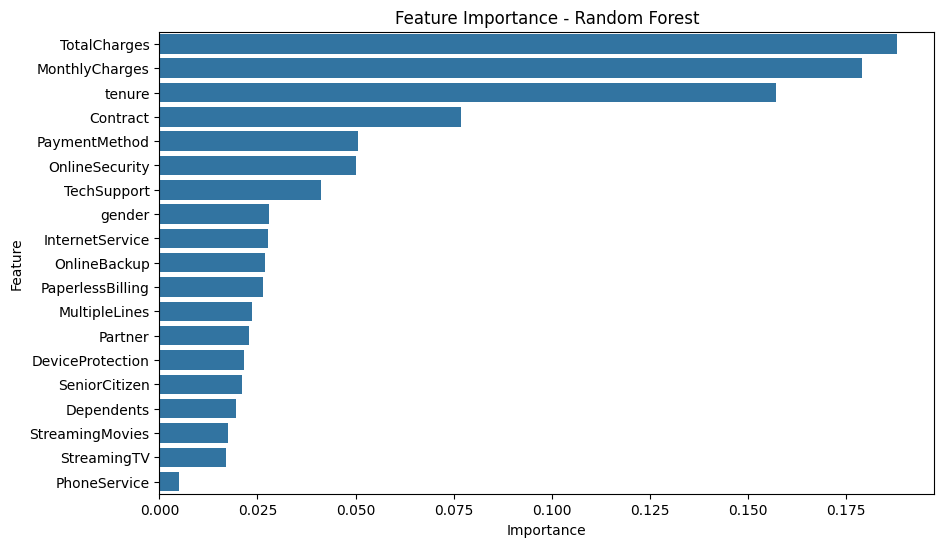

In [32]:
#feature importance for radnom forest
importances = rf_model.feature_importances_
features = data.drop("Churn", axis=1).columns
imp_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=imp_df)
plt.title("Feature Importance - Random Forest")
plt.show()

In [33]:
#INSIGHT total charges , monthly charges and tenure are the top 3 important features

In [37]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Random Forest Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

XGBoost Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.60      0.52      0.55       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted

In [42]:
#logistic regression gave the best recall which is most important in business for customer retention

Logistic Regression ROC-AUC: 0.8402800382340025
Random Forest ROC-AUC: 0.8246790152160995
XGBoost ROC-AUC: 0.8185396161099487


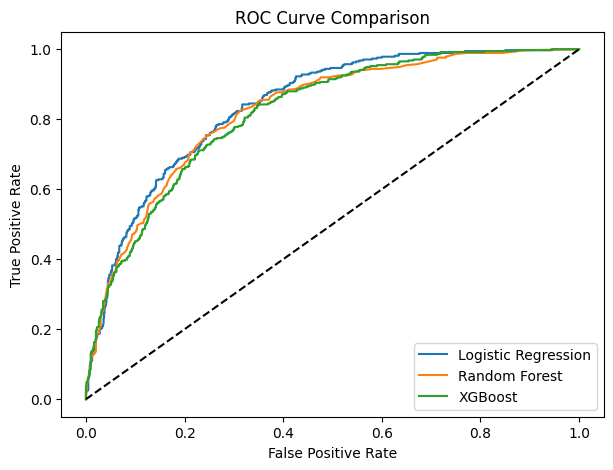

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_log_proba = log_model.predict_proba(X_test)[:,1]
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred_log_proba))

y_pred_rf_proba = rf_model.predict_proba(X_test)[:,1]
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf_proba))

y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:,1]
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred_xgb_proba))

# ALL MODELS TOGETHER
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_proba)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost")
plt.plot([0,1],[0,1],'k--')  # diagonal = random guess
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [ ]:
#LogisticRegression was the strongest model in separating churners vs non-churners.”

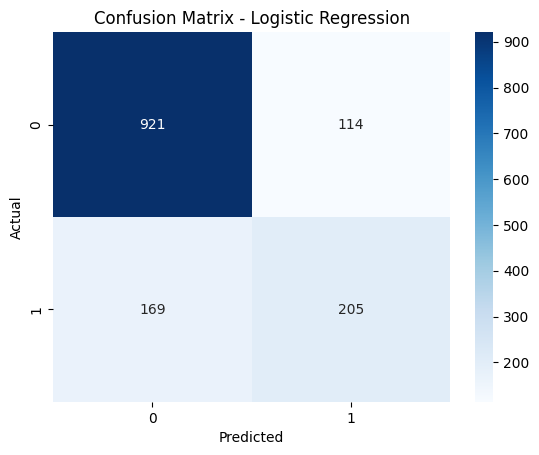

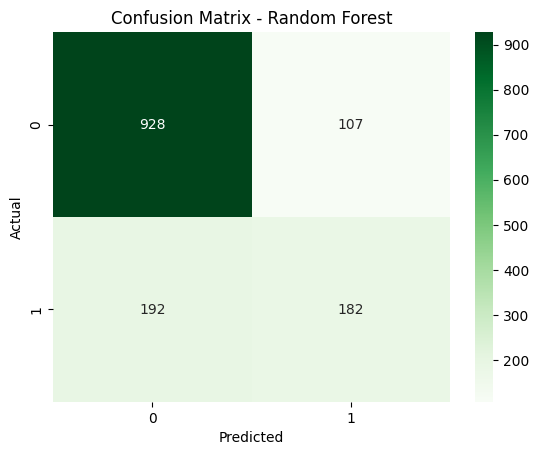

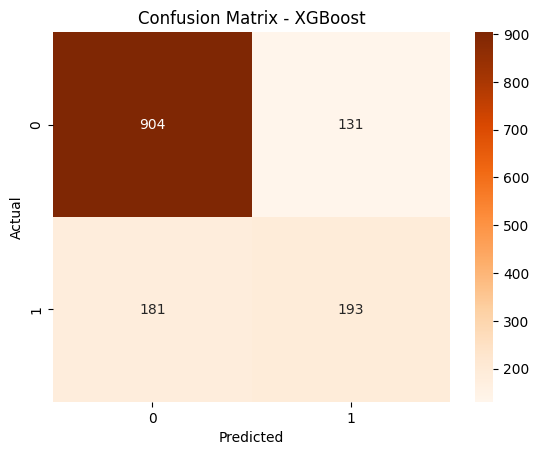

In [40]:

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [41]:
#random forest is the best model to predict customers who actually didnt churned

In [ ]:
#“Our analysis showed that while all three models performed well in detecting loyal customers, Logistic Regression provided the best recall for churners, making it more effective for real-world retention strategies. With further tuning and handling of data imbalance, the models can be improved to support stronger customer engagement and reduce revenue loss.”